In [ ]:
##################Class 1 Question 1#######################
# How do you handle duplicate values in a dataset in Python?

In [ ]:
Duplicate data can be problematic because they use up unnecessary amounts of memory 
and cause unneeded calculations to be performed when processing data. In addition, 
they can also skew analysis results.
We can drop duplicates by '.drop_duplicates()' method.

In [ ]:
########################Python Method#########################
###################### NOT TO RUN ############################
import pandas as pd 

df = pd.merge(friend_request, request_accepted, how='left', left_on=('requester_id','sent_to_id'), right_on='requestor_id', 'acceptor_id')
total_request = df.count
total_accept = sum(pd.isnull(df['acceptor_id']))
rate = total_accept / total_accept
print(rate)

In [14]:
##################Class 1 Question 2#######################
#You are given two tables - friend_request and request_accepted. 
#Friend_request contains requestor_id, time 
# and sent_to_id and request_accepted table contains 
# time, acceptor_id and requestor_id. 
# How will you determine the overall acceptance rate of requests? 

In [ ]:
########################SQL Method############################
###################### NOT TO RUN ############################
# I assume that the primary key of friend_request table should not be any
# any columns mentioned in the questions because each requestor can sent
# multiple time of requests and vice versa.

SELECT COUNT(a.acceptor_id)/ COUNT(r.requester_id) AS rate
FROM
(
SELECT DISTINCT r.requester_id, r.sent_to_id, a.acceptor_id, a.requestor_id      
FROM friend_request AS r
LEFT JOIN request_accepted AS a
  ON r.sent_to_id = a.acceptor_id 
    AND r.requester_id =a.requestor_id);

In [10]:
##################Class 1 Question 3#######################
################## Questions omitted #####################
Company Name: ALIBABA
Alibaba Group’s three primary businesses ：
1.Alibaba.com:trading B2B platform, like Amazon in the US. don't participate in logistics
2. Taobao. C2C, like ebay but does not charge commision （闲鱼 swift shop）, also selling ads as GOOGLE
3. Tmall. B2C aimed at middle class customers.
other business:
    Alipay, an online payment system similar PayPal
Juhuasuan, a flash sale site similar to Groupon 
Alibaba Cloud Computing
Aliwangwang, an instant messaging service
Laiwang, a messaging application competing with Tencent’s WeChat
Large stakes in Sina Weibo, the Chinese equivalent to Twitter, and Youku Tudou, the Chinese version of YouTube
A film business, a football team, and a mutual fund


What is the product：very diverse depending on which business model is. Generally trading form.
    Alibaba group is a business ecosystem which associated with the service and includes the Taobao, Tmall, and so on. 
    In 2016, Alibaba group announced that it has become the largest retail trading platform in the world ( (80 percent of all Chinese online retail sales) ). 
    With the help of the UC. Scott map, it establish the financial business support system of electricity(Zhifubao) and electric core business. 
    They provide a complete set of local life services and health care. The entertainment business and intelligent terminal business help people to enjoy the life. 
    The key of the development of business ecosystem is data. The data are come form the marketing services and cloud services, 
    effective data integration gripper is the pay treasure (Cadle, J., Paul, D., and Turner,P. 2010).
Who are the customer: Supplier side: small business over the world 
                      Buyer side: orther small business or individual consumers particularly in China
How do they make money: 1.Alibaba.com: commission on each transaction
                        2. Huabei： interest
                        3.Taobao：ad
        
                        It is a collection of companies operating under different business models and with different revenue sources.
                        Alibaba is not dependent on any one revenue stream. It can generate revenue from many diverse business lines and pricing structures.

If you were CEO, what would you do to increase company’s revenue in the next 5 years?
GIven by the increasing demand in Cloud Computing, could serivice will boost the company's revenue in next
5 years. Ali needs more a precise computing system to target on consumers. Right now, Jingdong has advantage on
logistics side like what Amazon is doing, to maintain and forward a stride in Chinese market, ali should not give up logistics.
So i would suggest to cooperate with large logistic companies like SF express etc.. to make customers send and receive items more easily and efficienty.
This is only my general personal thoughts, I can go details if I am asked to do so.



In [144]:
# Import data
file_location = "/Users/linn/Desktop/Python Notebook/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)
print(my_data.head())

  country        date  experiment_id              order_id  spend_usd  \
0      US  2017-04-02       12624549   6720123150182430132      49.99   
1      US  2017-04-01       12624549  17511438899767627798       0.99   
2      US  2017-04-04       12624549   1549342062436664018      39.99   
3      US  2017-04-04       12624549   7771425263197855716      19.99   
4      US  2017-04-01       12624549  17943210556580942992      19.99   

               user_id      vertical  
0  3659561261588336546  ANDROID_APPS  
1  3659561261588336546  ANDROID_APPS  
2  3659561261588336546  ANDROID_APPS  
3  3659561261588336546  ANDROID_APPS  
4  3659561261588336546  ANDROID_APPS  


In [98]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
##################Class 2 Question 1#######################
Similarly to PrintDailyTimeSeries() in the sample code, write a Python function called PrintCumulativeTimeSeries(). Specifically:

The function takes three inputs:
-	experiment_id
-	country
-	vertical

The function produces two outputs:
-	A time series chart showing the cumulative uplift 
      (hint: search for cumsum)
Print out the cumulative % uplift on revenue, experiment vs. control. 
       Hint: (red - blue) / blue %

In [99]:
import datetime
np.unique(my_data["experiment_id"])

array([12624548, 12624549])

In [100]:
# Define the 1st function
# for any given experiment_id, return a list group by date
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)


In [101]:
# test if it works
red = GetSeries(my_data,12624548)
blue = GetSeries(my_data,12624549)
print(red)
print(blue)


date
2017-04-01    55504.518743
2017-04-02    31317.138253
2017-04-03    31583.940583
2017-04-04    23615.742230
2017-04-05    30899.812674
2017-04-06    27768.181870
2017-04-07    32957.001652
Name: spend_usd, dtype: float64
date
2017-04-01    54019.941288
2017-04-02    34642.988992
2017-04-03    28645.762133
2017-04-04    27604.259313
2017-04-05    33149.441763
2017-04-06    29310.726245
2017-04-07    34640.122009
Name: spend_usd, dtype: float64


In [102]:
# Define the 2nd function
# for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

(array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 7 Text xticklabel objects>)

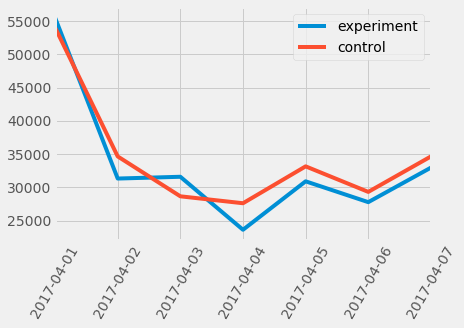

In [184]:
# test if this works
date_series = my_data.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)
plt.xticks(rotation=60)


In [296]:
################# The answer for this question###################
# Define the 3rd function
#date_series = np.unique(my_data["date"])

def PrintCumulativeTimeSeries(experiment_ids, country, vertical):
    
    file_location = "/Users/linn/Desktop/Python Notebook/"
    file_name = "orders_new.csv"
    
    my_data_1 = pd.read_csv(file_location + file_name)
    
    date_series = np.unique(my_data_1["date"])
    
    index_series = np.sort(date_series) 
    
    my_data = my_data_1.sort_values("date", ascending=True, inplace=False)
    
    treatment_table = my_data[["date","spend_usd"]][(my_data.experiment_id == experiment_ids[0]) 
                                                     & (my_data.country == country)
                                                     & (my_data.vertical == vertical)]
    treatment_series = np.cumsum(treatment_table.groupby('date')['spend_usd'].sum())
    #print(treatment_series)
    control_table = my_data[["date","spend_usd"]][(my_data.experiment_id == experiment_ids[1]) 
                                                  & (my_data.country == country)
                                                  & (my_data.vertical == vertical)]
    #print(control_table)
    control_series = np.cumsum(control_table.groupby('date')['spend_usd'].sum())                                              
    #print(control_series)
    PlotSeries(index_series, treatment_series, control_series)
    plt.xticks(rotation=60)
    plt.title("Cumulative Time Series")
    cummulative_lift_rate = (100 *(control_series - treatment_series)/treatment_series).to_frame()
    print(cummulative_lift_rate)
  

            spend_usd
date                 
2017-04-01 -18.318187
2017-04-02  15.265639
2017-04-03  12.237487
2017-04-04  16.133876
2017-04-05  12.085132
2017-04-06  11.984032
2017-04-07   7.230077


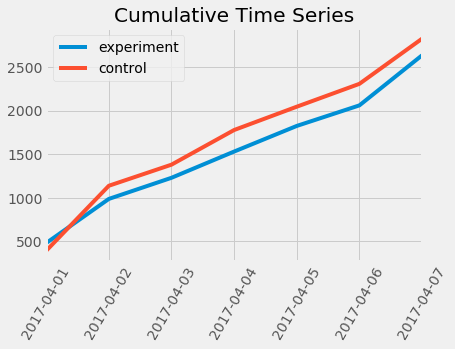

In [297]:
# Let's test it out!
PrintCumulativeTimeSeries([12624548,12624549], "US", "YOUTUBE")


In [ ]:
##################Class 2 Question 2#######################
Using our data, draw a histogram which plots both US and JP data on the same plot. 

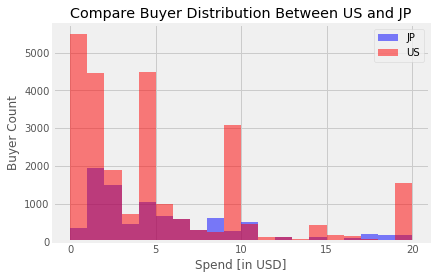

In [153]:
# Slicing data
my_series_jp = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "JP")]
my_series_us = my_data["spend_usd"][(my_data.spend_usd < 20) & (my_data.country == "US")]
plt.hist(my_series_jp, bins=20, color='blue',alpha=0.5,label='JP')
plt.hist(my_series_us, bins=20, color='red', alpha=0.5, label='US')

# Strings
xlab = 'Spend [in USD]'
ylab = 'Buyer Count'
title = 'Compare Buyer Distribution Between US and JP'

# Add axis labels
plt.xlabel(xlab)
plt.ylabel(ylab)

# Add title
plt.title(title) 

# Add a legend 
plt.legend(loc='upper right')

# Set style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# After customizing, display the plot
plt.show()


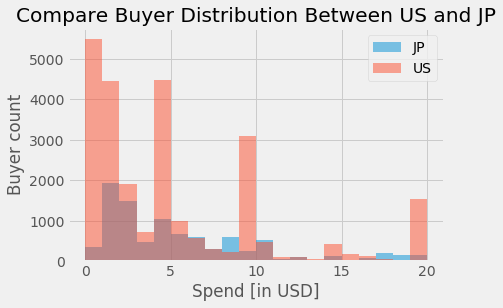

In [42]:
# Or use the method taught in class
fig, ax = plt.subplots()
ax.hist(my_series_jp, bins=20, alpha=0.5, label='JP')
ax.hist(my_series_us, bins=20,alpha=0.5, label='US')
ax.set_title("Compare Buyer Distribution Between US and JP")
ax.set_ylabel("Buyer count")
ax.set_xlabel("Spend [in USD]")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [ ]:
##################Class 2 Question 3#######################
for this question I guess we need another def inside the 3rd function.
I assume there is only one control group,( which is the first? )and all other 9 groups are treatement groups. 
so the treatement group will be the same.


def PrintCumulativeTimeSeries(experiment_ids, country, vertical):
     
    date_series = my_data.date
    index_series = np.unique(date_series) 
    index_series = np.sort(index_series) 
    
    for i in range(len(experiment_ids)):
        if experiment_ids[i] == 0:
            control_table = my_data[["date","spend_usd"]][(my_data.experiment_id == experiment_ids[i]) 
                                                  & (my_data.country == country)
                                                  & (my_data.vertical == vertical)]
            control_series = np.cumsum(control_table.groupby('date')['spend_usd'].sum())
         else:
            treatment_table = my_data[["date","spend_usd"]][(my_data.experiment_id == experiment_ids[i]) 
                                                     & (my_data.country == country)
                                                     & (my_data.vertical == vertical)]
            treatment_series = np.cumsum(treatment_table.groupby('date')['spend_usd'].sum())
            
       PlotSeries(index_series, treatment_series, control_series)
       cummulative_lift_rate = (100 *(control_series - treatment_series)/treatment_series).to_frame()
       print(cummulative_lift_rate)
       
            